In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
df = pd.read_csv("E:\\NEW DOWNLOADS\\german_credit_data_with_target.csv")
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [59]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


## Preliminary Analysis

#### Age Distribution of dataset

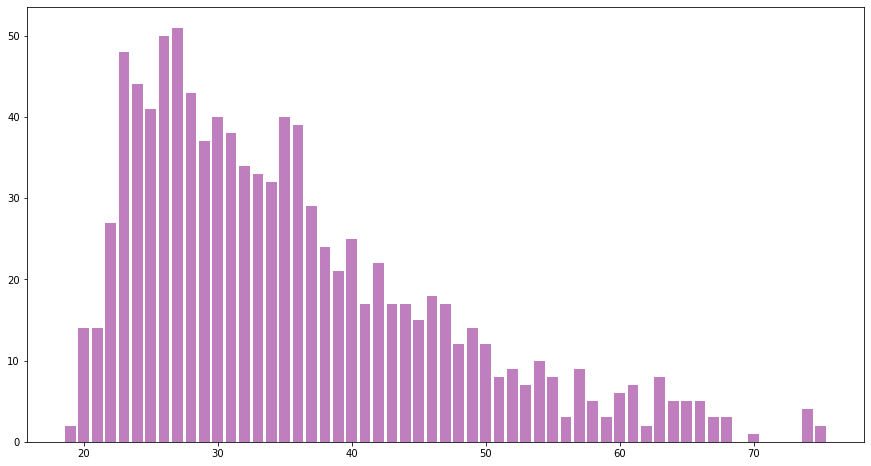

In [61]:
plt.figure(figsize = (15,8))
age_counts = df['Age'].value_counts()
age_counts = age_counts.sort_index()
plt.bar(age_counts.index, age_counts.values, color='purple', alpha=0.5)
plt.show()

##### We can see that the data is 'Right-Skewed', meaning most of the people taking the credit card loans are between 20 & 30

### Age distribution for good & bad credit

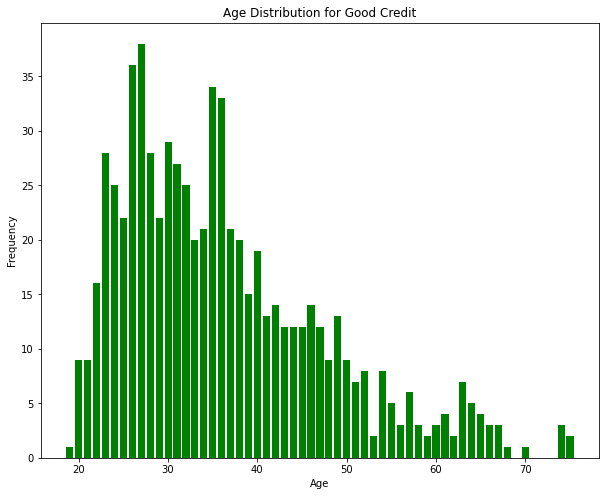

In [62]:
good_credit_age = df[df['Risk'] == 'good']['Age'].value_counts()
good_credit_age.sort_index()

plt.figure(figsize=(10,8))
plt.bar(good_credit_age.index, good_credit_age.values,  color='green', label='Good Risk')
plt.title("Age Distribution for Good Credit")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

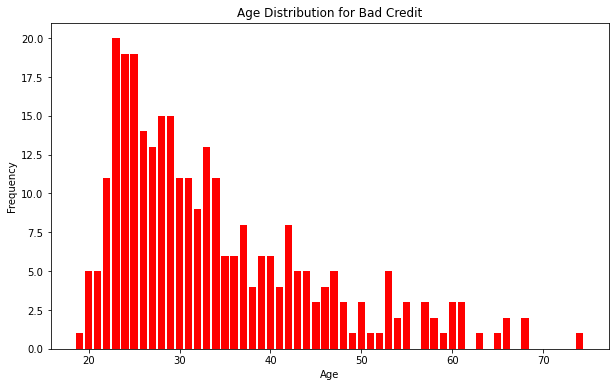

In [63]:
bad_credit_age = df[df['Risk'] == 'bad']['Age'].value_counts()
bad_credit_age.sort_index()

plt.figure(figsize=(10,6))
plt.bar(bad_credit_age.index, bad_credit_age.values, color = 'red', label = 'Bad Risk')
plt.title("Age Distribution for Bad Credit")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [64]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


## Unique Value Analysis

In [65]:
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

Age -- 53
Sex -- 2
Job -- 4
Housing -- 3
Saving accounts -- 4
Checking account -- 3
Credit amount -- 921
Duration -- 33
Purpose -- 8
Risk -- 2


## Categorical Features Analysis

#### We aim to visualize the number of bad creditors and identify if there is a pattern with respect to the columns

In [66]:
categorical_var_list = list(df.select_dtypes('object').columns)
len(categorical_var_list)

6

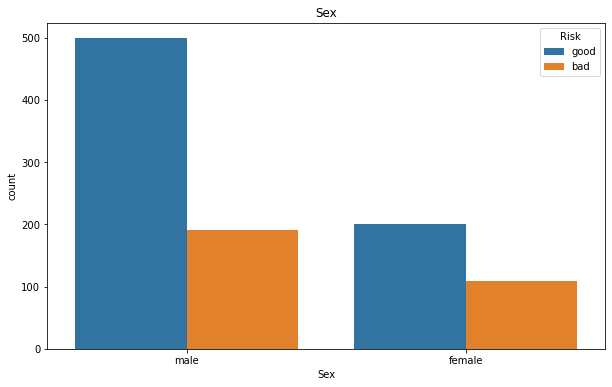

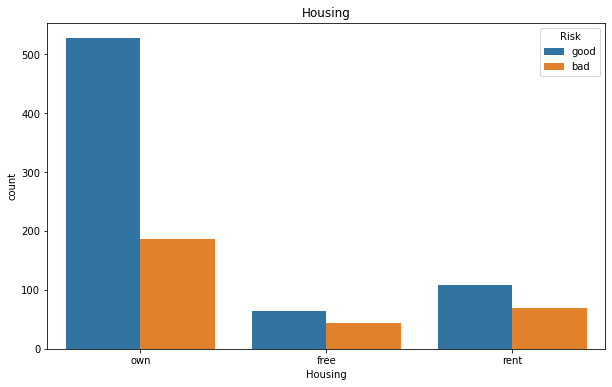

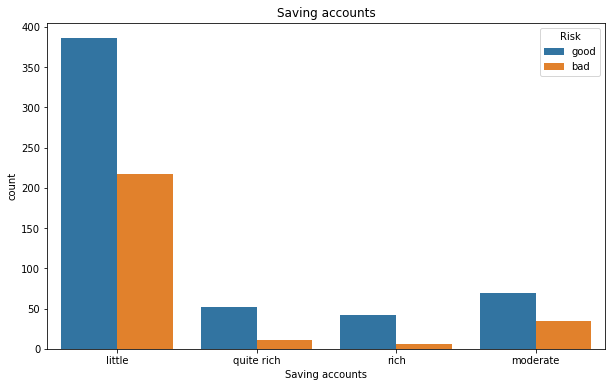

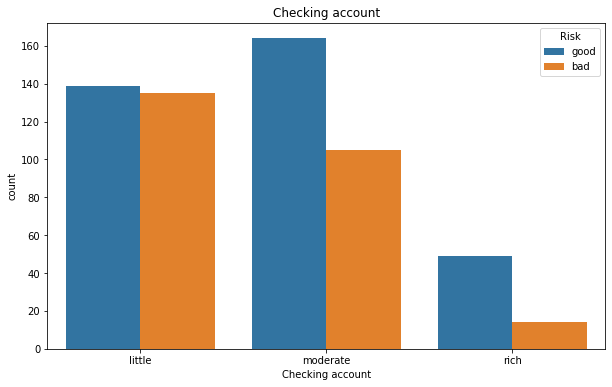

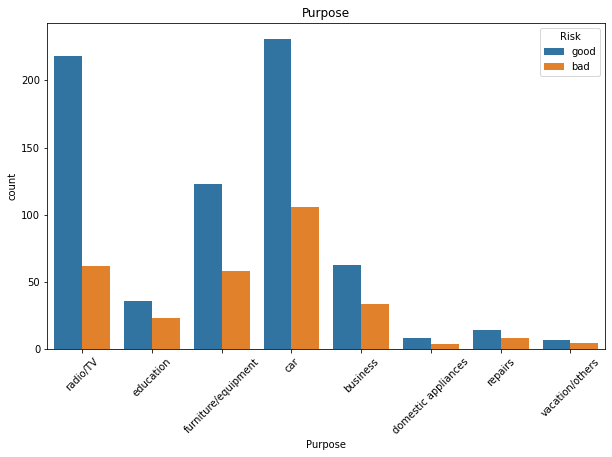

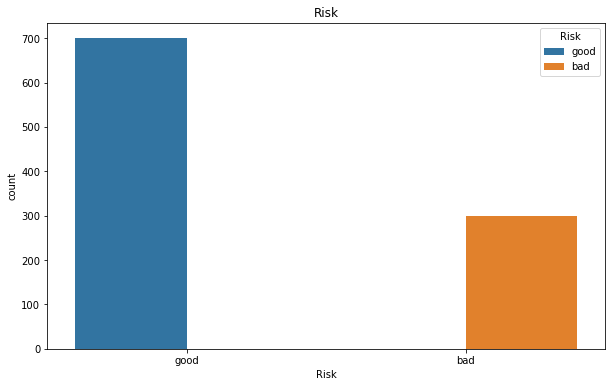

In [67]:
data_categoric = df.loc[:, categorical_var_list]

for i in categorical_var_list:
    plt.figure(figsize=(10,6))
    sns.countplot(x = i, data = data_categoric, hue = "Risk")
    plt.title(i)
    if i == "Purpose":
        plt.xticks(rotation = 45)

## Numeric Feature Visualization

In [68]:
numeric_var_list = list(df.select_dtypes('int64'))
numeric_var_list

['Age', 'Job', 'Credit amount', 'Duration']

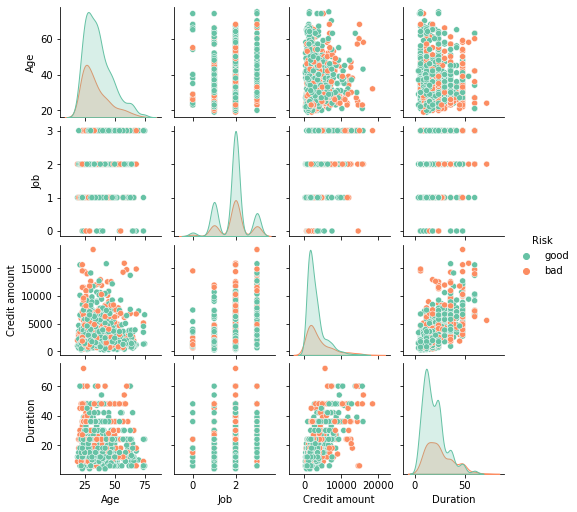

In [69]:
data_numeric = df.loc[:,numeric_var_list + ["Risk"]]
sns.pairplot(data_numeric, hue = "Risk", diag_kind= "kde", palette = "Set2", height=1.8)
plt.show()

## Missing Value Analysis

In [70]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

Since the categoric features are the only ones having missing values, they can be handled by One-Hot Encoding

## Categoric Features' One-Hot Encoding

In [71]:
df2 = df.copy()
df2 = pd.get_dummies(df2, columns=categorical_var_list[:-1])
df2.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Risk', 'Sex_female',
       'Sex_male', 'Housing_free', 'Housing_own', 'Housing_rent',
       'Saving accounts_little', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_rich', 'Purpose_business', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')

In [72]:
df2.head()

,Age,Job,Credit amount,Duration,Risk,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,good,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,bad,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,good,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,good,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,bad,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


## Numeric Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix, fbeta_score
from sklearn.linear_model import LogisticRegression

In [74]:
scaler = StandardScaler()
df2[numeric_var_list[:-1]] = scaler.fit_transform(df2[numeric_var_list[:-1]])


We scaled all the numerical columns to have a mean for 0 and a variance of 1

## Outlier Detection

In [75]:
numeric_var_list = ['Age', 'Credit amount', 'Duration']
df_numeric = df2.loc[:, numeric_var_list]
df_numeric.head()

,Age,Credit amount,Duration
0,2.766456,-0.745131,6
1,-1.191404,0.949817,48
2,1.183312,-0.416562,12
3,0.831502,1.634247,42
4,1.535122,0.566664,24


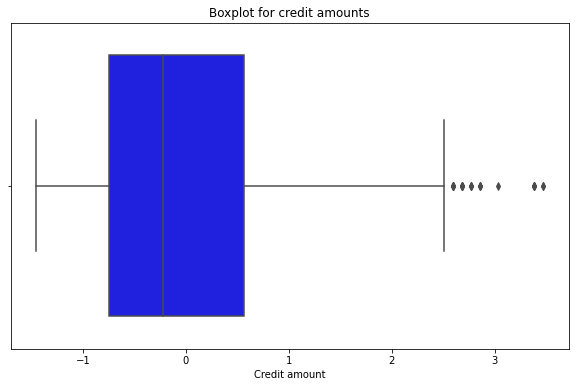

In [76]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df2['Age'], color='blue')
plt.title("Boxplot for credit amounts")
plt.xlabel("Credit amount")
plt.show()

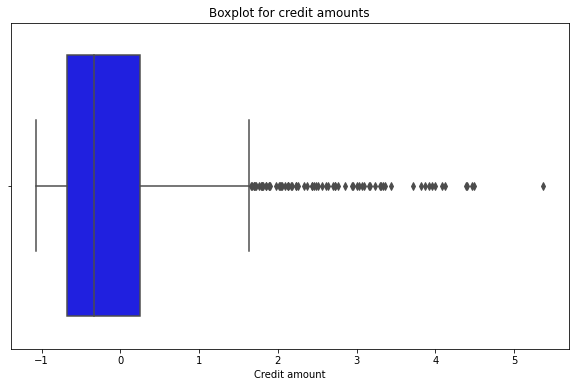

In [77]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df2['Credit amount'], color='blue')
plt.title("Boxplot for credit amounts")
plt.xlabel("Credit amount")
plt.show()

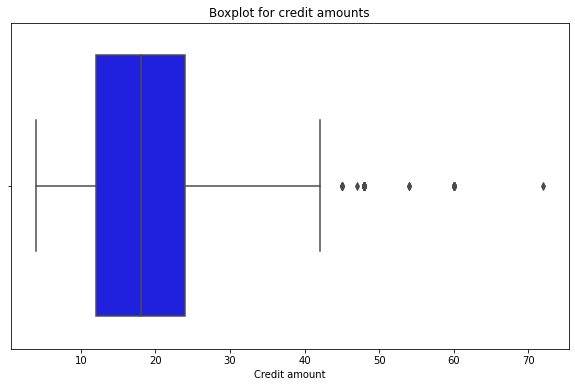

In [78]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df2['Duration'], color='blue')
plt.title("Boxplot for credit amounts")
plt.xlabel("Credit amount")
plt.show()

### Outlier Handling

In [79]:
for i in numeric_var_list:

  #Calculating the Inter Quartile Range
  Q1 = np.percentile(df2.loc[:,i], 25)
  Q3 = np.percentile(df2.loc[:,i], 75)
  IQR = Q3 - Q1

  #Defining Bounds
  lower_bound = Q1 - (2.5*IQR)
  upper_bound = Q3 - (2.5*IQR)

  print(f"\n Processing Feature: {i}")
  print(f" Old Shape: {df2.loc[:,i].shape}")

  #Replace Outliers
  df2.loc[df2[i] < lower_bound, i] = lower_bound
  df2.loc[df2[i] > upper_bound, i] = upper_bound

  print(f"FEATURE '{i}' PROCESSED.  Outliers replaced with bounds.")

print("\n Outlier Replacement Complete!!")


 Processing Feature: Age
 Old Shape: (1000,)
FEATURE 'Age' PROCESSED.  Outliers replaced with bounds.

 Processing Feature: Credit amount
 Old Shape: (1000,)
FEATURE 'Credit amount' PROCESSED.  Outliers replaced with bounds.

 Processing Feature: Duration
 Old Shape: (1000,)
FEATURE 'Duration' PROCESSED.  Outliers replaced with bounds.

 Outlier Replacement Complete!!


In [80]:
df2.head()

,Age,Job,Credit amount,Duration,Risk,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,-2.730572,0.146949,-2.061401,-6,good,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,-2.730572,0.146949,-2.061401,-6,bad,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,-2.730572,-1.383771,-2.061401,-6,good,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,-2.730572,0.146949,-2.061401,-6,good,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-2.730572,0.146949,-2.061401,-6,bad,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


## Feature Correlation

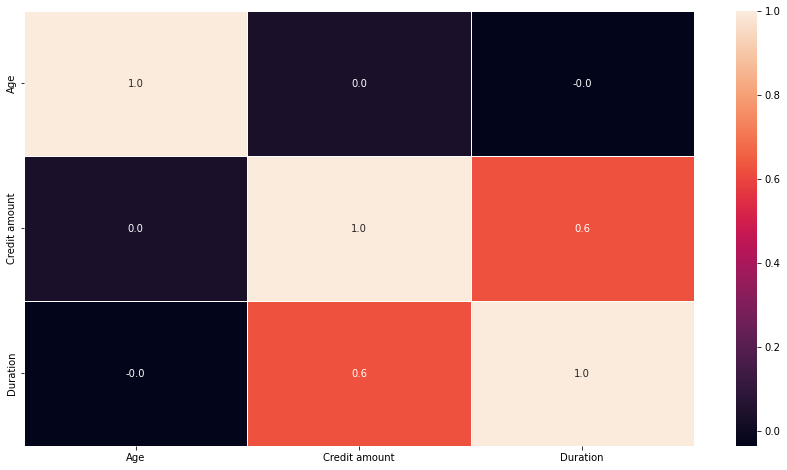

In [81]:
plt.figure(figsize=(15,8))
sns.heatmap(df_numeric.corr(), annot = True, fmt = ".1f", linewidths=.7)
plt.show()

## Data-Split

In [82]:
df2['y'] = df2['Risk'].apply(lambda x: 0 if x=='good' else 1)
y = df2['y']
df2.drop(['Risk'], axis = 1, inplace = True)
df2.drop(['y'], axis = 1, inplace = True)

x = df2

#Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

## ROC-Curve Function

In [83]:
def plot_roc_curve(y_test, y_pred_prob, model_name):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label = f'{model_name} (AUC = {roc_auc: .2f})')
  plt.plot([0,1], [0,1], color = 'green', lw = 2, linestyle = '--')
  plt.xlabel ('Fale Positive Rate')
  plt.ylabel('False Negative Rate')
  plt.title('ROC Curve')
  plt.legend(loc = 'lower right')

## Classification -- K Nearest Neighbour

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best hyperparams: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


[[191  18]
 [ 69  22]]


Fbeta Score: 0.272


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       209
           1       0.55      0.24      0.34        91

    accuracy                           0.71       300
   macro avg       0.64      0.58      0.58       300
weighted avg       0.68      0.71      0.67       300



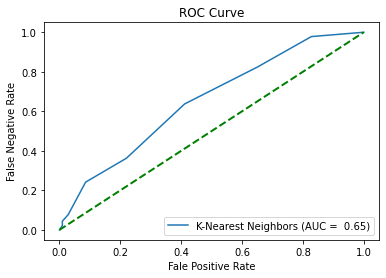

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

#hyperparameter tuning using grid-search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid Search
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
grid_search_knn.fit(x_train, y_train)
print("Best hyperparams:", grid_search_knn.best_params_)
best_knn = grid_search_knn.best_estimator_

#ROC
y_pred_knn = best_knn.predict(x_test)
y_pred_prob_knn = best_knn.predict_proba(x_test)[:, 1]

print("\n")
print(confusion_matrix(y_test, y_pred_knn))
print("\n")
print(f"Fbeta Score: {fbeta_score(y_test, y_pred_knn, beta=2):.3f}")
print("\n")

# ROC Curve
plot_roc_curve(y_test, y_pred_prob_knn, "K-Nearest Neighbors")
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))